In [1]:
"""
July 7, 2020

Looking at results of the MCMCs.
"""

import ares
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import distpy

In [2]:
# Independent variables
redshifts = np.sort(np.array([0.10165, 0.25,    0.35 ,   0.45,    0.575,   0.725,   0.875,   0.9,     ]))
#1.125, 1.65,    1.75,    2.25,    2.5,   ]))#  2.75,    3.5,  ]))

Ms = np.linspace(7, 12, 60)

# blob 1: the smf
blob_n1 = ['galaxy_smf']
blob_i1 = [('z', redshifts), ('logbins', Ms)]
blob_f1 = ['StellarMassFunction']

# blob 2: the sfrd
blob_n2 = ['galaxy_sfrd']
blob_i2 = [('z', redshifts)]
blob_f2 = ['SFRD']

In [18]:
# anl = ares.analysis.ModelSet('MCMC_files/blob_test1')
# anl = ares.analysis.ModelSet('..\Cedar\savedFits/smf_14_07_13-54_4') #default, batch run
anl = ares.analysis.ModelSet('..\Cedar\savedFits/smf_20_07_13-59_1.5-5.0')

labels = \
{
    'pq_func_par0[0]': 'beta_0',
    'pq_func_par2[0]': 'beta_1', 

    #norm
    'pq_func_par0[1]': 'N_0',
    'pq_func_par2[1]': 'nu', 

    #gamma
    'pq_func_par0[2]': 'gamma_0',
    'pq_func_par2[2]': 'gamma_1', 

    #peak mass
    'pq_func_par0[3]': 'logM_0',
    'pq_func_par2[3]': 'mu', 
}

anl.custom_labels = labels

# anl.skip = 5000


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ..\Cedar\savedFits/                                                                    ####
#### prefix      : smf_20_07_13-59_1.5-5.0                                                                ####
#### N-d         : 8                                                                                      ####


In [19]:
# data = anl.ExtractData(['galaxy_smf', 'galaxy_sfrd'])
# print(data['galaxy_smf'])
# print(data['galaxy_sfrd'][0])

# print(data)

# Loading ..\Cedar\savedFits/smf_20_07_13-59_1.5-5.0.dd*.chain.pkl...
# Loaded ..\Cedar\savedFits/smf_20_07_13-59_1.5-5.0.dd*.chain.pkl in 0.14 s.
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0000.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0001.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0002.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0003.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0004.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0005.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0006.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0007.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0008.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0009.blob_2d.galaxy_smf.pkl
# Loaded ..\Cedar\savedFits\smf_2

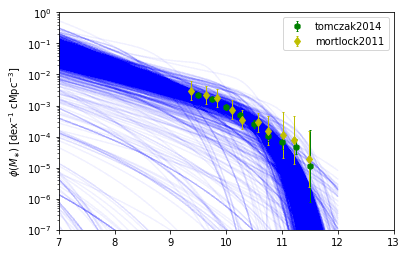

In [20]:
#look at the raw LF samples

z = 2.75

gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
gpop.PlotSMF(z, ax=ax, round_z=0.2, log10Mass=True)

# ax.set_ylim(1e-35, 1)
# ax.set_xlim(1e7, 1e13)

ax.legend()
pl.show()

In [21]:
params = \
['pq_func_par0[0]',
    'pq_func_par2[0]',

    #norm
    'pq_func_par0[1]',
    'pq_func_par2[1]', 

    #gamma
    'pq_func_par0[2]',
    'pq_func_par2[2]', 

    #peak mass
    'pq_func_par0[3]',
    'pq_func_par2[3]' 
]

0 of 17920 chain elements ignored because of chain links with inf's/nan's.


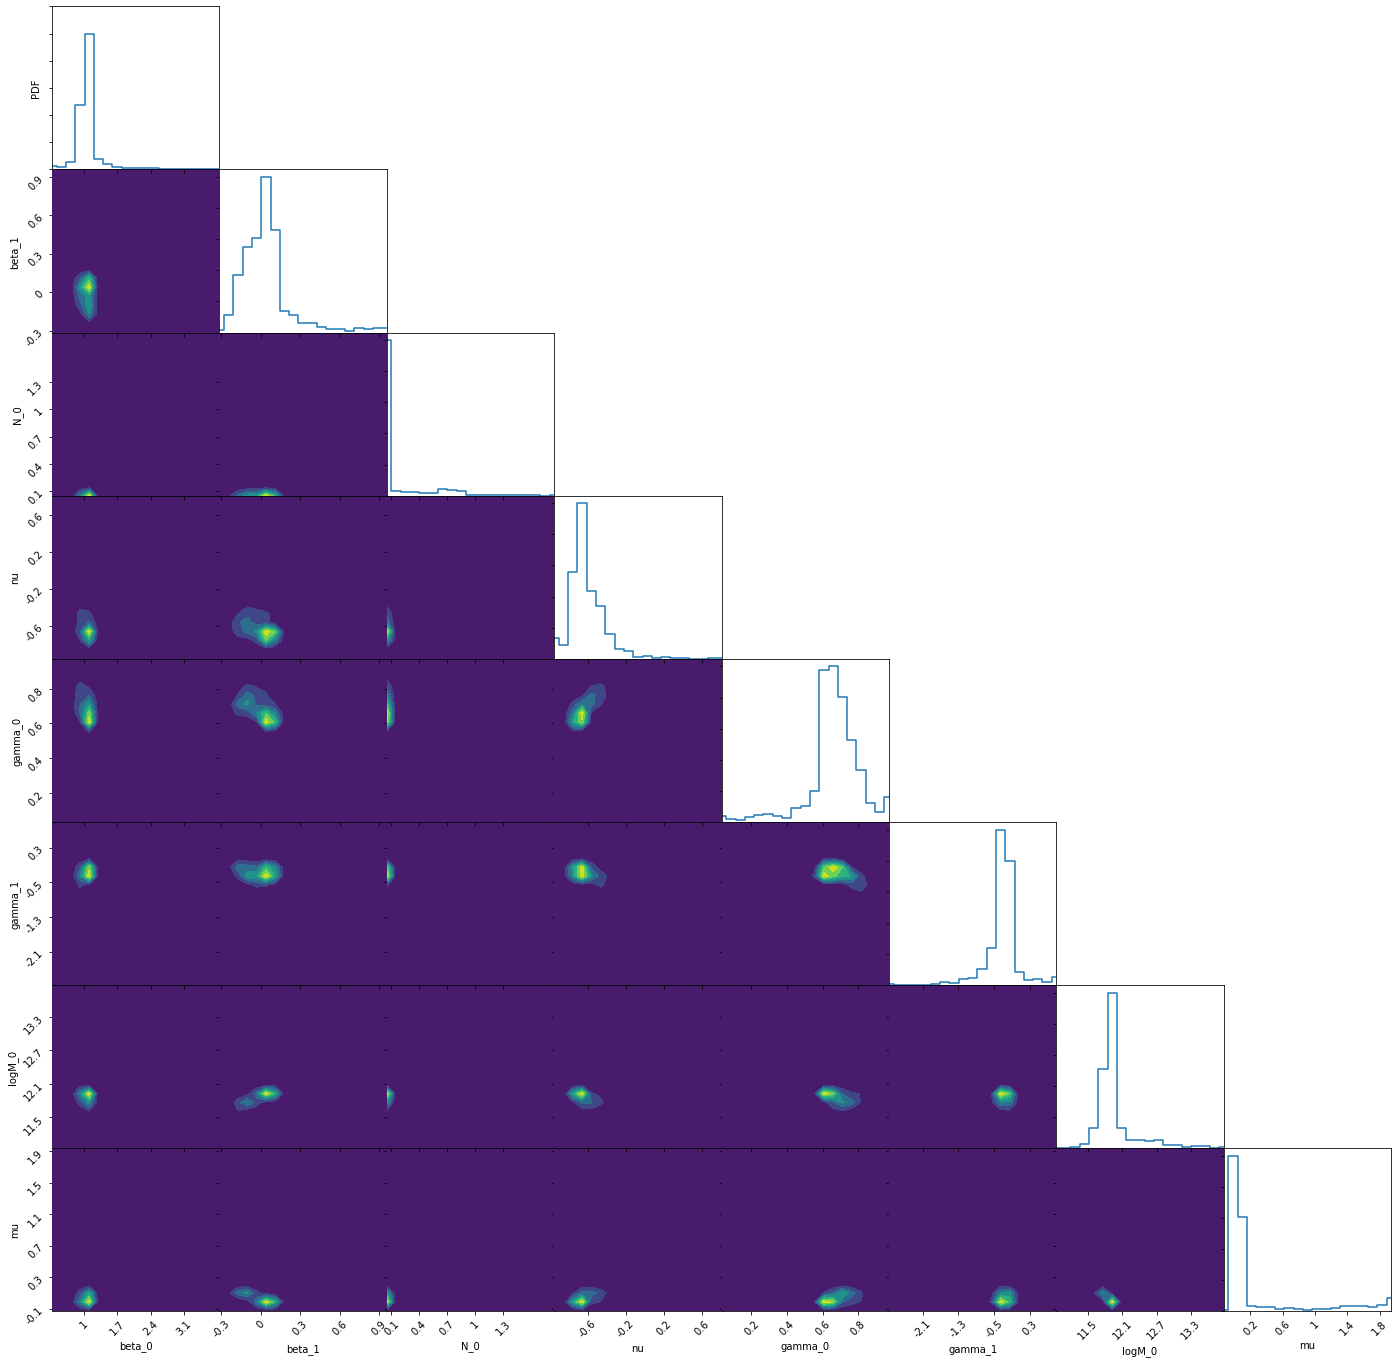

In [22]:

trig = anl.TrianglePlot(pars=params)

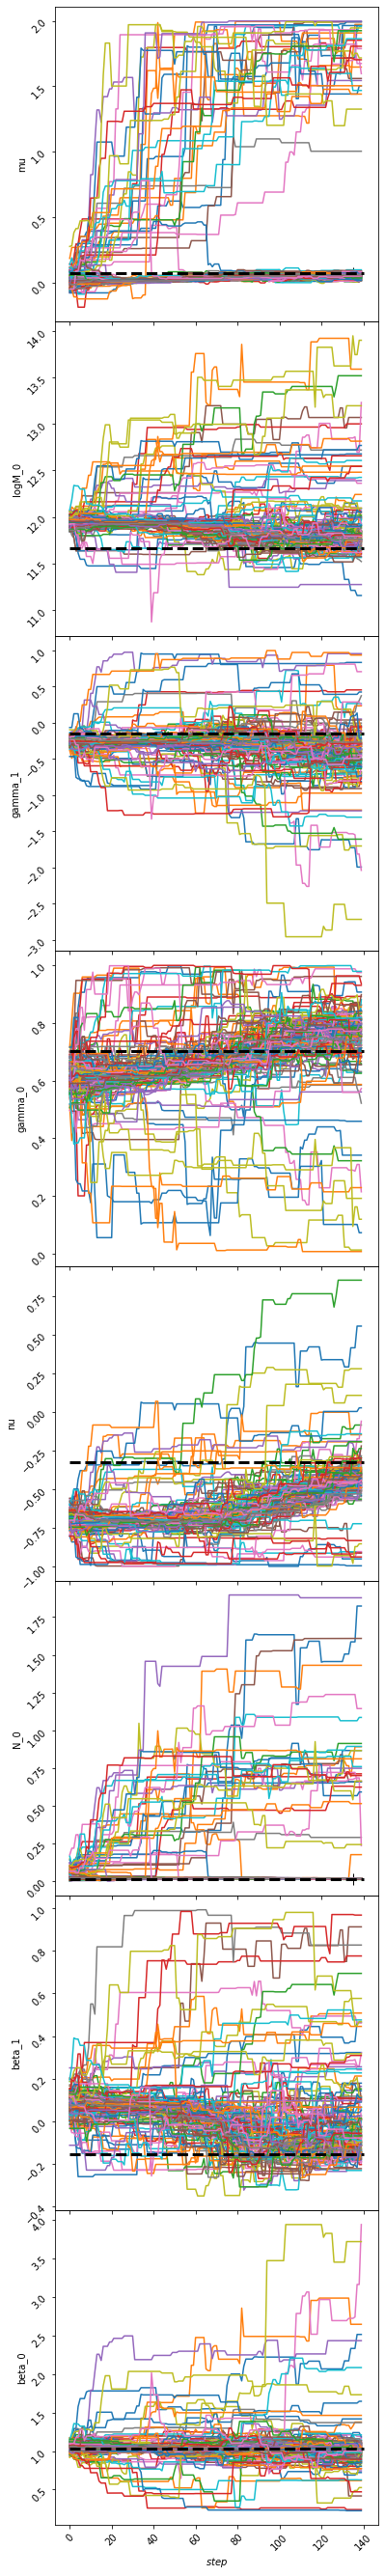

In [23]:
anl.WalkerTrajectoriesMultiPlot(best_fit='mode')

In [24]:
# print(anl.max_likelihood_parameters())

covar = anl.CovarianceMatrix(params)

In [25]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[params[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch)
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [26]:
fit_best_like = anl.max_likelihood_parameters()

for i in range(len(covar[0])):
    print(anl.get_1d_error(params[i])) #(maximum likelihood value, positive error, negative error).

(1.033269047241775, array([0.10579557, 0.090412  ]))
(-0.15292202688528772, array([ 0.28608226, -0.03279799]))
(0.016876546112182852, array([ 0.26782921, -0.0006788 ]))
(-0.3270539306001672, array([-0.13321915,  0.4034797 ]))
(0.7030193733932658, array([0.07830002, 0.11442768]))
(-0.1522648388217001, array([-0.00195139,  0.34710178]))
(11.660705878082252, array([ 0.40630903, -0.08913538]))
(0.07576970824967669, array([0.54731002, 0.05992956]))


In [27]:
pars_best = ares.util.ParameterBundle("emma:model1")

# print(fit_best_like)

pars_best.update(fit_best_like)
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
[9.65882770e-02 8.82134126e-02 8.05465544e-02 7.35286589e-02
 6.71055843e-02 6.12276817e-02 5.58494215e-02 5.09290256e-02
 4.64282091e-02 4.23119112e-02 3.85479447e-02 3.51067941e-02
 3.19613941e-02 2.90869274e-02 2.64606384e-02 2.40616625e-02
 2.18708687e-02 1.98707154e-02 1.80451197e-02 1.63793347e-02
 1.48598390e-02 1.34742352e-02 1.22111563e-02 1.10601640e-02
 1.00117164e-02 9.05705720e-03 8.18815365e-03 7.39764189e-03
 6.67877194e-03 6.02535703e-03 5.43172676e-03 4.89268452e-03
 4.40346892e-03 3.95971799e-03 3.55743617e-03 3.19296460e-03
 2.86295326e-03 2.56433574e-03 2.29430605e-03 2.05029718e-03
 1.82996146e-03 1.63114325e-03 1.45188394e-03 1.29039602e-03
 1.14504222e-03 1.01432753e-03 8.96887404e-04 7.91458163e-04
 6.96916684e-04 6.12234900e-04 5.36449135e-04 4.68712926e-04
 4.08238158e-04 3.54318539e-04 3.06295034e-04 2.63594516e-04
 2.25681744e-04 1.92074913e-04 1.62342292e-04 1.3609

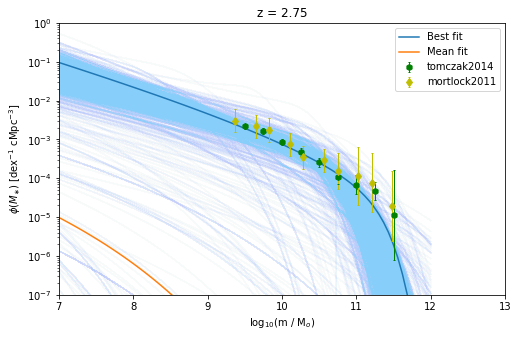

In [28]:
z = 2.75

fig, ax = pl.subplots(figsize=(8, 5))
Ms_short = np.linspace(7, 12, 80)

ls_best = pop_best.StellarMassFunction(z, Ms_short)

print(ls_best)

ls_mean = pop_mean.StellarMassFunction(z, Ms_short)

ax = anl.ReconstructedFunction('galaxy_smf', ivar=[z, None], samples='all', color='lightskyblue', alpha=0.01, ax=ax)

obslf = ares.analysis.GalaxyPopulation()
obslf.PlotSMF(z=z, ax=ax, round_z=0.2, log10Mass=True)

pl.semilogy(Ms_short, ls_best, label='Best fit')

pl.semilogy(Ms_short, ls_mean, label='Mean fit')

pl.title("z = %.2f" %z)
pl.xlabel("log$_{10}$(m / M$_o$)")
pl.legend()
# pl.ylim(1e-15, 1e2)
pl.show()

# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0000.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0001.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0002.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0003.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0004.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0005.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0006.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0007.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0008.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0009.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0010.blob_1d.galaxy_sfrd.pkl
# Loaded ..\Cedar\savedFits\smf_20_07_13-59_1.5-5.0.dd0011.blob_1d.galaxy_sfrd.pkl
# Lo

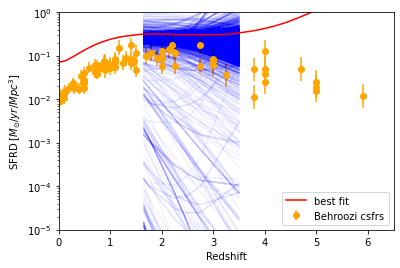

In [29]:
Zs = np.linspace(0, 7, 50)

import UsefulHODFunctions as UHF
csfrs, err = UHF.getCsfrsData()

ax = anl.ReconstructedFunction('galaxy_sfrd', ivar=None, samples='all', color='b', alpha=0.01)

SFRD_mod = pop_best.SFRD(Zs)
# print(SFRD_mod)

ax.semilogy(Zs, SFRD_mod, label="best fit", color='r')

ax.errorbar(csfrs[0], 10**csfrs[1], yerr=[err[0], err[1]], ls="", marker="o", color="orange", label="Behroozi csfrs" )

pl.ylabel('SFRD $[M_{\odot}/yr/Mpc^3]$')
pl.xlabel('Redshift')
pl.legend()

pl.ylim(1e-5, 1e0)
pl.xlim(0, 6.5)

pl.show()

No handles with labels found to put in legend.


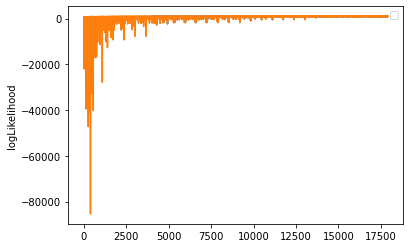

In [30]:
#loglikelihood
ticks = np.linspace(0, len(anl.logL)-1, len(anl.logL))

xstart = 4000

pl.plot(ticks[xstart:], anl.logL[xstart:])
pl.plot(ticks, anl.logL)

pl.ylabel("logLikelihood")
# pl.ylim(1100,1160)
pl.legend()
pl.show()
